In [1]:
import torch

# Detection du gpu et utilisation si disponible
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda:0


In [2]:
import torch
from torch import nn
from pathlib import Path
from chess_pytorch_ia.autoencoder.model_64 import AutoEncoder64
# Chemin vers le fichier de sauvegarde des poids
path = Path().resolve().parent / 'weights' / f'auto_encoder_64.pth'

model = AutoEncoder64().to(device=device)
model.load_state_dict(torch.load(f'{path}'))

<All keys matched successfully>

In [3]:
# Fonction pour calculer la précision du modèle
from chess_pytorch_ia.analys import check_accuracy

In [4]:
from torch.utils.data import DataLoader
from chess_pytorch_ia.autoencoder.datasets.dataset_64 import RandomMoveDataset64

# Charge les données
dataset = RandomMoveDataset64()
loader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

In [5]:
check_accuracy(loader, model, device)

'100.00'

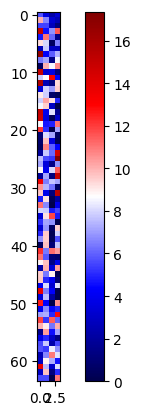

In [6]:
from matplotlib import pyplot as plt
import numpy
from chess_pytorch_ia.autoencoder.datasets.dataset_64 import create_64_data_matrix

model.eval()

dataset = [create_64_data_matrix(idx) for idx in range(64)]
dataset = torch.from_numpy(numpy.array(dataset)).float()
dataset = dataset.to(device=device)

lattent_space = model.encode(dataset)
min_ = lattent_space.min()
max_ = lattent_space.max()

# Afficher le tenseur en utilisant une échelle de couleurs allant du min au max
plt.imshow(lattent_space.cpu().detach().numpy(), cmap='seismic', vmin=min_, vmax=max_)
plt.colorbar()
plt.show()

In [7]:
display(lattent_space)

tensor([[5.7085e+00, 3.6346e+00, 2.1854e+00, 3.3810e+00],
        [1.0064e+01, 6.6170e+00, 3.2927e+00, 2.5448e+00],
        [5.4429e+00, 5.4440e+00, 2.7302e+00, 1.1992e+00],
        [1.4985e+01, 4.5945e+00, 6.8333e+00, 1.1529e+01],
        [4.7007e+00, 1.1059e+01, 6.0572e+00, 1.5063e+00],
        [9.2595e+00, 7.9906e+00, 5.1574e-01, 6.5198e+00],
        [2.6573e+00, 7.7687e+00, 2.8617e+00, 2.8008e+00],
        [1.6713e+01, 4.1549e+00, 5.9415e+00, 7.3516e+00],
        [6.3902e+00, 7.1417e+00, 1.3693e+00, 8.5273e+00],
        [5.7174e-01, 1.0004e+01, 8.4869e+00, 1.0688e+01],
        [1.4942e+01, 3.2205e+00, 3.6930e+00, 1.2889e+00],
        [7.8000e+00, 8.7078e+00, 1.3285e+01, 4.3939e+00],
        [1.5766e+01, 2.5093e+00, 1.2293e+00, 9.3446e+00],
        [3.5196e+00, 7.8831e+00, 6.9561e+00, 9.5313e+00],
        [9.0693e+00, 7.8621e+00, 6.7959e-01, 3.1688e-01],
        [7.8352e+00, 1.0220e+01, 9.2025e+00, 4.9633e+00],
        [8.5256e+00, 9.5428e+00, 2.9435e+00, 0.0000e+00],
        [1.494